In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('datasets/college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


## Basic JointGrid

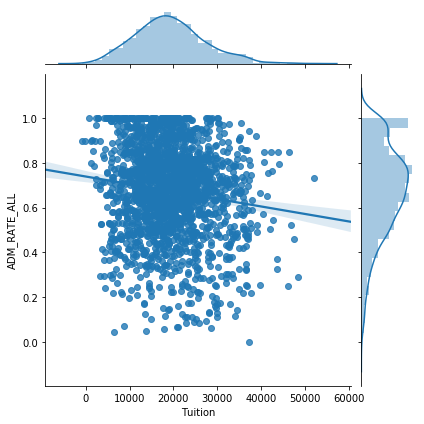

In [4]:
g = sns.JointGrid(data=df, x='Tuition', y='ADM_RATE_ALL')
g.plot(sns.regplot, sns.distplot);

## Advanced JointGrid

c:\python\python37\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


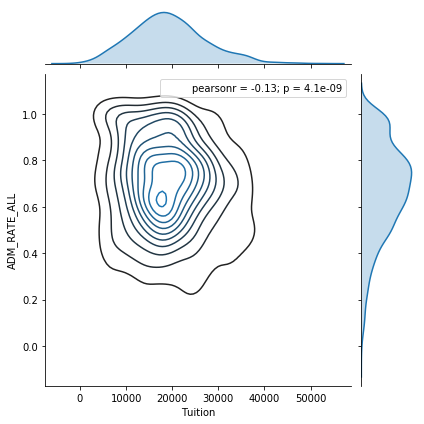

In [8]:
g = sns.JointGrid(data=df, x='Tuition', y='ADM_RATE_ALL')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)
g = g.annotate(stats.pearsonr);

## jointplot()

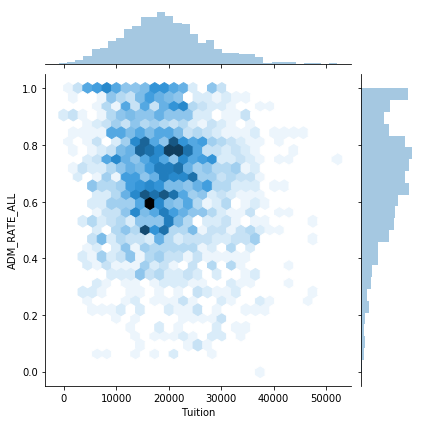

In [9]:
sns.jointplot(data=df, x='Tuition', y='ADM_RATE_ALL', kind='hex');

## Customizing a jointplot

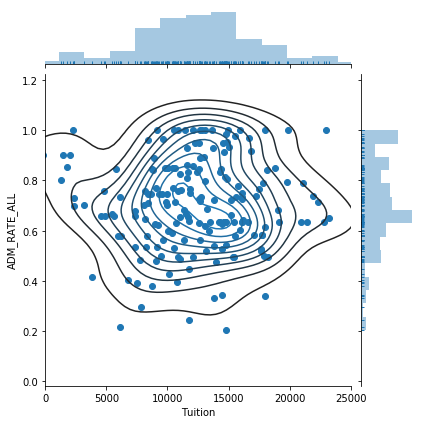

In [13]:
g = (sns.jointplot(x='Tuition', y='ADM_RATE_ALL', kind='scatter',
                 xlim=(0,25000), marginal_kws=dict(bins=15, rug=True),
                 data=df.query('UG < 2500 & Ownership == "Public"'))
    .plot_joint(sns.kdeplot)); # overlaying KDE plot

# Exercise

Using Bicycle Dataset

In [17]:
df = pd.read_csv('datasets/bike_share.csv', parse_dates=['dteday'])
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
sns.set_style('whitegrid')

### Using JointGrid

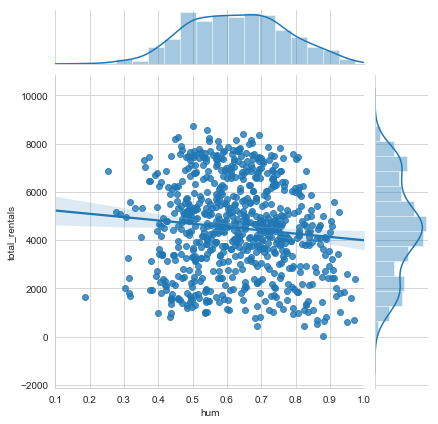

In [19]:
g = sns.JointGrid(x='hum', y='total_rentals', data=df,
                 xlim=(0.1, 1.0))
g = g.plot(sns.regplot, sns.distplot);

### Using jointplot()

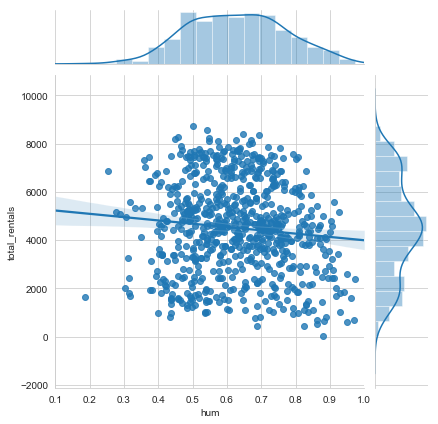

In [22]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df, xlim=(0.1,1.0));

#### 2nd order polynomial regression

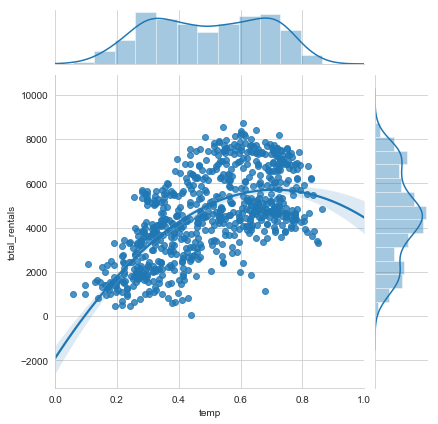

In [24]:
sns.jointplot(x='temp', y='total_rentals', kind='reg', 
             data=df, order=2, xlim=(0,1));

#### Use a residual plot to check the appropriateness of the model

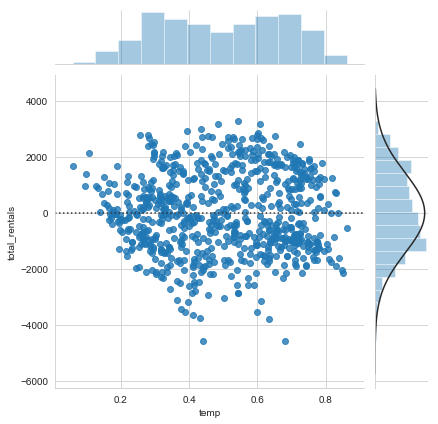

In [25]:
sns.jointplot(x='temp', y='total_rentals', data=df,
              kind='resid', order=2);

#### Complex jointplots

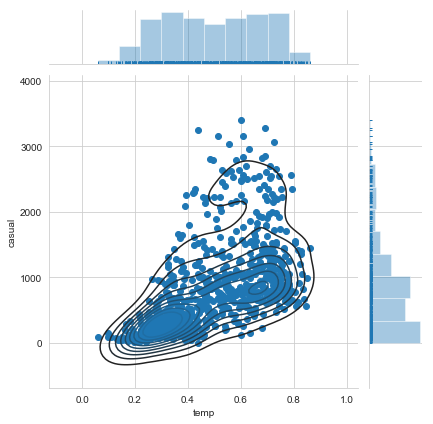

In [29]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
# g.annotate(stats.pearsonr);

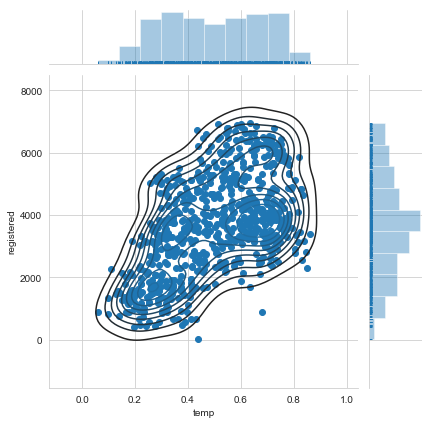

In [28]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot));